In [1]:
# !pip install yfinance

## 주식데이터 예측하기

In [1]:
import yfinance as yf
pfe = yf.Ticker('066570.KS')

In [2]:
hist = pfe.history(period='2y')
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-06 00:00:00+09:00,155801.392969,160238.774414,154322.265820,157773.562500,3084796,0.0,0.0
2021-04-07 00:00:00+09:00,157773.580442,161224.877514,155801.410686,156294.453125,2655588,0.0,0.0
2021-04-08 00:00:00+09:00,157773.578275,158266.620707,153829.238818,154322.281250,1735278,0.0,0.0
2021-04-09 00:00:00+09:00,155308.368247,160238.792636,154815.325808,156294.453125,1764047,0.0,0.0
2021-04-12 00:00:00+09:00,156787.493411,158759.663139,153829.238818,154322.281250,1005281,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-30 00:00:00+09:00,114500.000000,115600.000000,113100.000000,113100.000000,570965,0.0,0.0
2023-03-31 00:00:00+09:00,114100.000000,115700.000000,113800.000000,115300.000000,855187,0.0,0.0
2023-04-03 00:00:00+09:00,116000.000000,116300.000000,113200.000000,113800.000000,713112,0.0,0.0


In [3]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-06 00:00:00+09:00,155801.392969,160238.774414,154322.265820,157773.562500,3084796,0.0,0.0
2021-04-07 00:00:00+09:00,157773.580442,161224.877514,155801.410686,156294.453125,2655588,0.0,0.0
2021-04-08 00:00:00+09:00,157773.578275,158266.620707,153829.238818,154322.281250,1735278,0.0,0.0
2021-04-09 00:00:00+09:00,155308.368247,160238.792636,154815.325808,156294.453125,1764047,0.0,0.0
2021-04-12 00:00:00+09:00,156787.493411,158759.663139,153829.238818,154322.281250,1005281,0.0,0.0


In [5]:
from tensorflow import keras
import pandas as pd
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [6]:
mid_prices = (hist['High'].values + hist['Low'].values)/2

train_len = 50
total_len = train_len + 1

train_data = []
label_data = []

mid_prices = mid_prices.reshape(-1,1)
mid_prices

array([[157280.52011719],
       [158513.14409996],
       [156047.92976238],
       [157527.0592222 ],
       [156294.45097843],
       [154568.79575893],
       [159745.74554954],
       [164183.12708939],
       [167634.42414688],
       [169360.06359649],
       [167880.94526708],
       [165415.72653897],
       [163443.56594037],
       [160978.3537844 ],
       [164429.65714878],
       [166155.29916729],
       [163443.57043159],
       [160485.31365741],
       [159006.17745536],
       [153582.71990927],
       [152350.109375  ],
       [149884.88613861],
       [151364.0268076 ],
       [151857.07369707],
       [148405.76787961],
       [145447.51116071],
       [144954.47761824],
       [146187.0881471 ],
       [146433.60047669],
       [146680.12825521],
       [147666.20871656],
       [148652.29358278],
       [146926.64506689],
       [150131.42513233],
       [150870.97543174],
       [148652.29358278],
       [149145.32255569],
       [150624.45423006],
       [1493

In [6]:
sc = MinMaxScaler(feature_range=(0, 1))
mid_prices = sc.fit_transform(mid_prices)

for index in range(len(mid_prices) - train_len):
    train_data.append(mid_prices[index:index + train_len ])
    label_data.append(mid_prices[index + train_len ])

print(train_data[0])
print(label_data[0])

[[0.71686865]
 [0.72495826]
 [0.78697748]
 [0.78697738]
 [0.83281781]
 [0.85169323]
 [0.85438982]
 [0.79506699]
 [0.81663875]
 [0.77079855]
 [0.71417238]
 [0.74113707]
 [0.69799345]
 [0.67642147]
 [0.74653027]
 [0.79506704]
 [0.82472844]
 [0.84630013]
 [0.86247918]
 [0.86787218]
 [0.88135448]
 [0.85438974]
 [0.87056852]
 [0.85708623]
 [0.8382109 ]
 [0.89483704]
 [0.94337384]
 [0.98112468]
 [1.        ]
 [0.98382117]
 [0.95685621]
 [0.9352844 ]
 [0.90831951]
 [0.94607025]
 [0.96494577]
 [0.93528427]
 [0.90292639]
 [0.8867477 ]
 [0.82742471]
 [0.81394239]
 [0.78697738]
 [0.80315646]
 [0.80854931]
 [0.77079854]
 [0.73844066]
 [0.73304761]
 [0.74653027]
 [0.74922666]
 [0.75192322]
 [0.76270913]]
[0.77349508]


In [7]:
import numpy as np

train_data = np.array(train_data)
label_data = np.array(label_data)

train_data.shape, label_data.shape

((445, 50, 1), (445, 1))

In [8]:
test_data = train_data[-50:]
test_label_data = label_data[-50:]
train_data = train_data[:-50]
label_data = label_data[:-50]

In [9]:
test_data.shape, train_data.shape

((50, 50, 1), (395, 50, 1))

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,
               input_shape=train_data.shape[1:],
               activation = 'relu'))
model.add(LSTM(50, return_sequences=False,activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

2023-03-10 16:54:36.226174: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [12]:
es = EarlyStopping(patience=20, monitor='val_loss') # 조기 종료
mc = ModelCheckpoint('/content/model_check',
                     monitor='val_loss',
                     save_best_only=True)
# 모델 저장 ( 최고 성능 일 때)

In [13]:
model.compile(loss='mse', optimizer='adam',metrics=['mae'])

In [1]:
model.fit(train_data, label_data,epochs=3,
          validation_data=(test_data,test_label_data),
          callbacks=[es, mc])

NameError: name 'model' is not defined

2/2 [==============================] - 0s 14ms/step


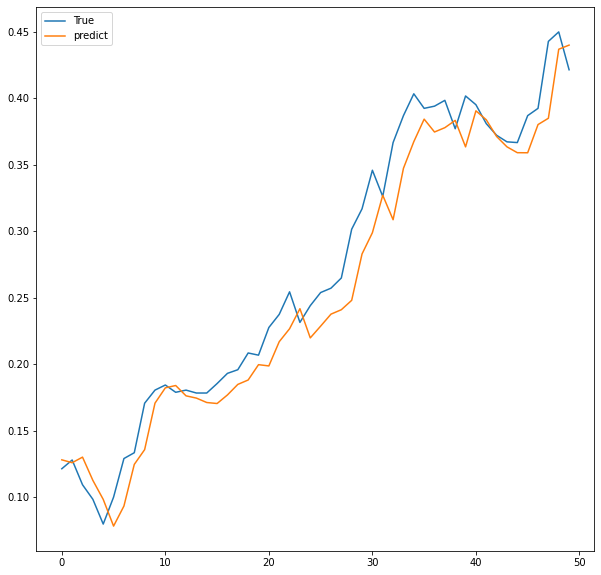

In [ ]:
import matplotlib.pyplot as plt
pred = model.predict(test_data)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(test_label_data , label='True')
ax.plot(pred , label='predict')
ax.legend()
fig.show()

In [ ]:
!echo "y" | pip install pandas

In [ ]:
openpyxl